# import list 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 데이터 로드

In [2]:
food_data = pd.read_csv('data/data1.csv')
# 통계
food_data.describe()

,1회 섭취량(g),kcal,탄수화물(g),단백질(g),지방(g),당류(g)
count,42342.000000,42342.00000,42342.000000,42342.000000,42342.000000,42342.000000
mean,422.665186,247.74919,32.415283,6.630332,9.326232,12.117616
std,16833.886789,800.09713,116.327142,10.646590,130.408472,85.926695
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,66.00000,8.500000,0.900000,0.500000,1.000000
50%,100.000000,164.80000,21.800000,4.000000,3.500000,6.000000
75%,165.000000,325.00000,45.000000,9.000000,11.000000,15.000000
max,1000000.000000,86395.00000,20999.000000,600.000000,26374.000000,16200.000000


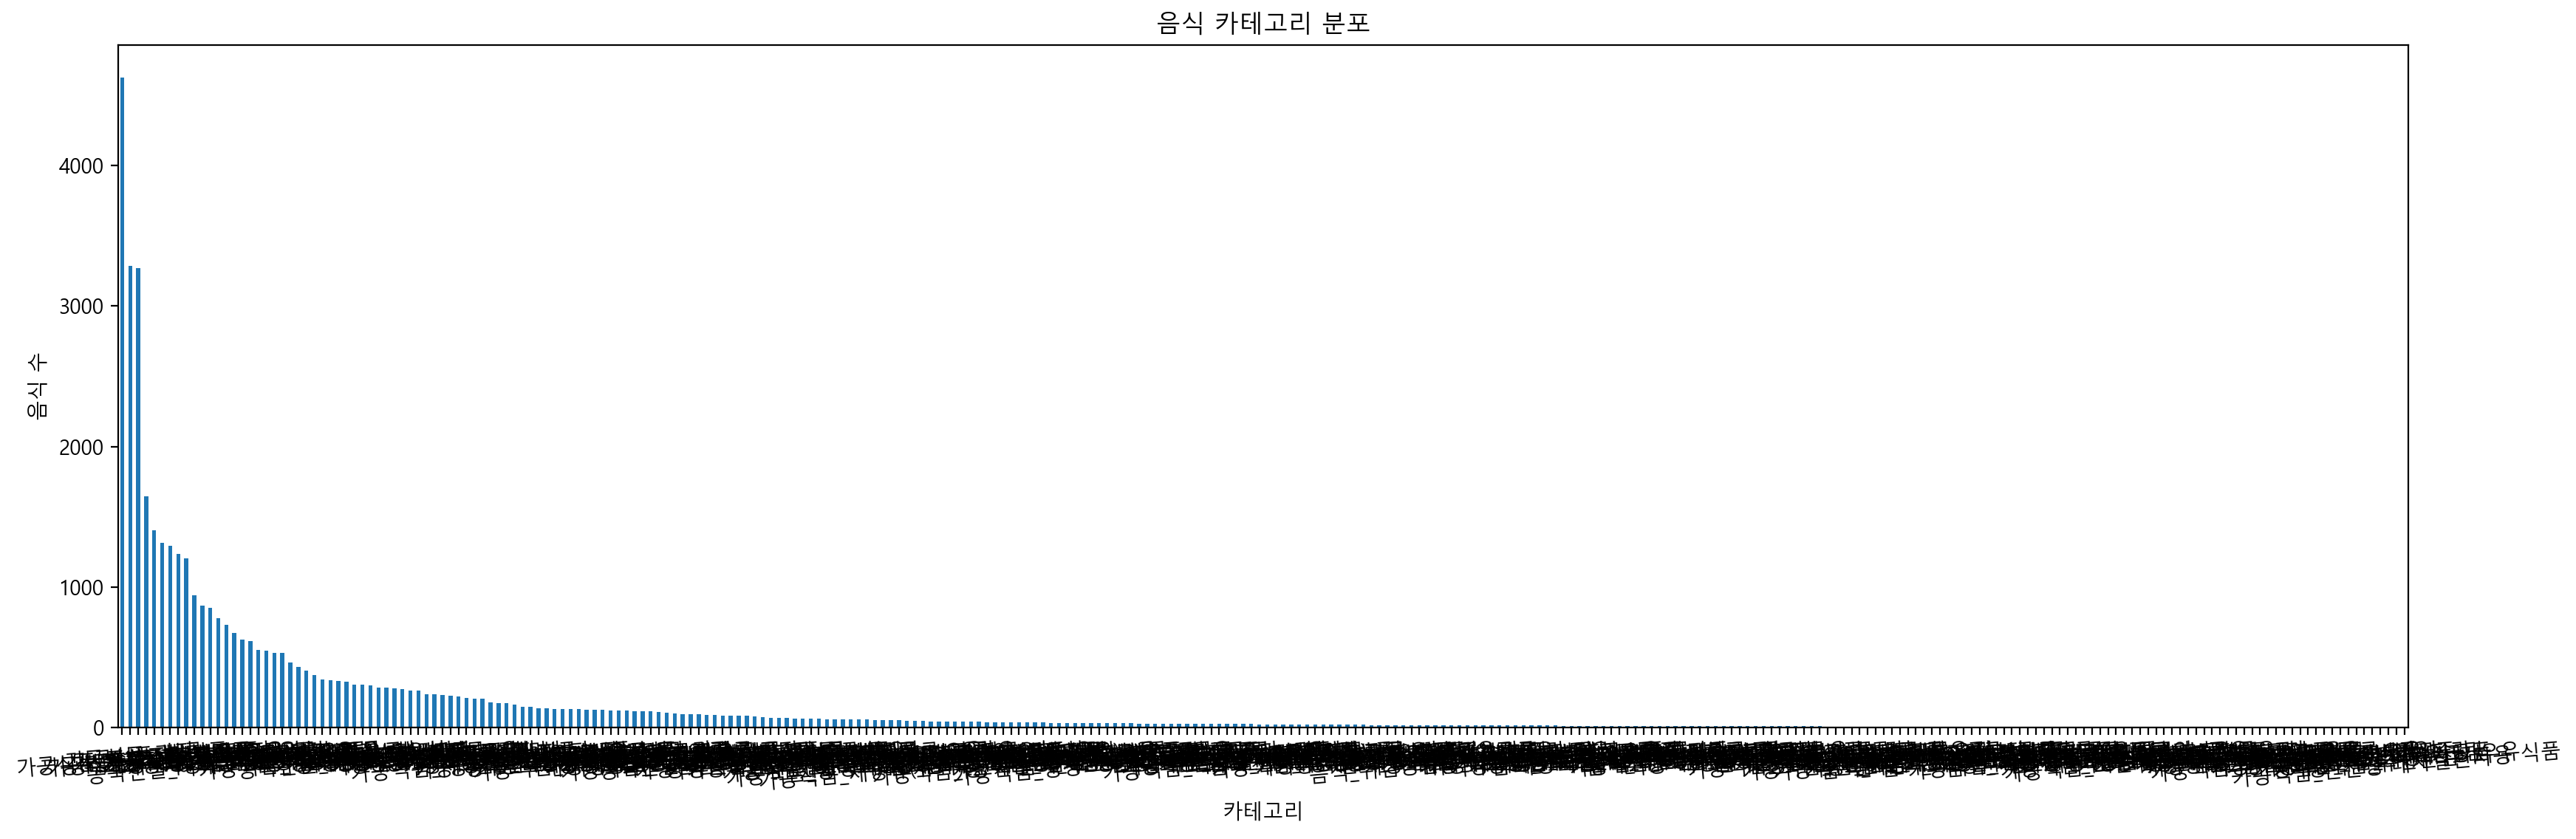

In [9]:
food_category = food_data['고유ID'].value_counts()
food_category.plot(kind='bar', figsize=(20, 6), title='음식 카테고리 분포', rot=5)
plt.xlabel('카테고리')
plt.ylabel('음식 수')
plt.show()

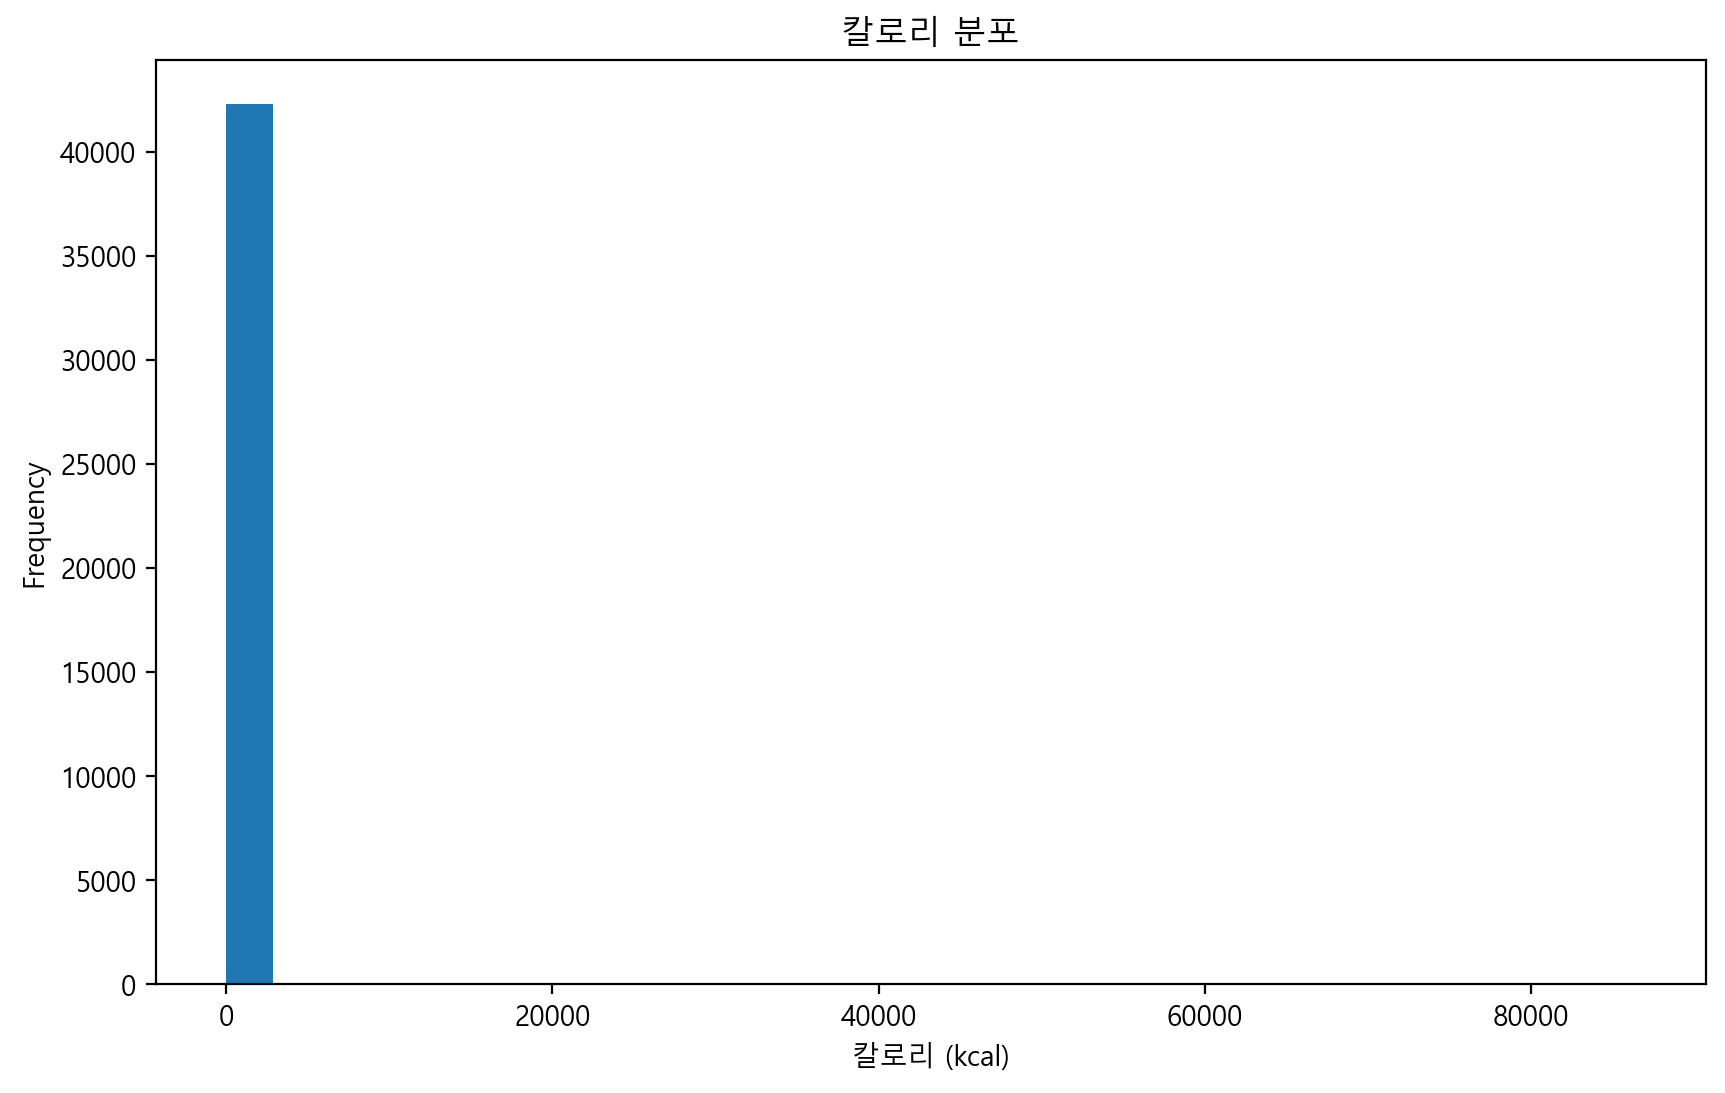

          탄수화물(g)    단백질(g)     지방(g)
탄수화물(g)  1.000000  0.432133  0.054409
단백질(g)   0.432133  1.000000  0.084721
지방(g)    0.054409  0.084721  1.000000


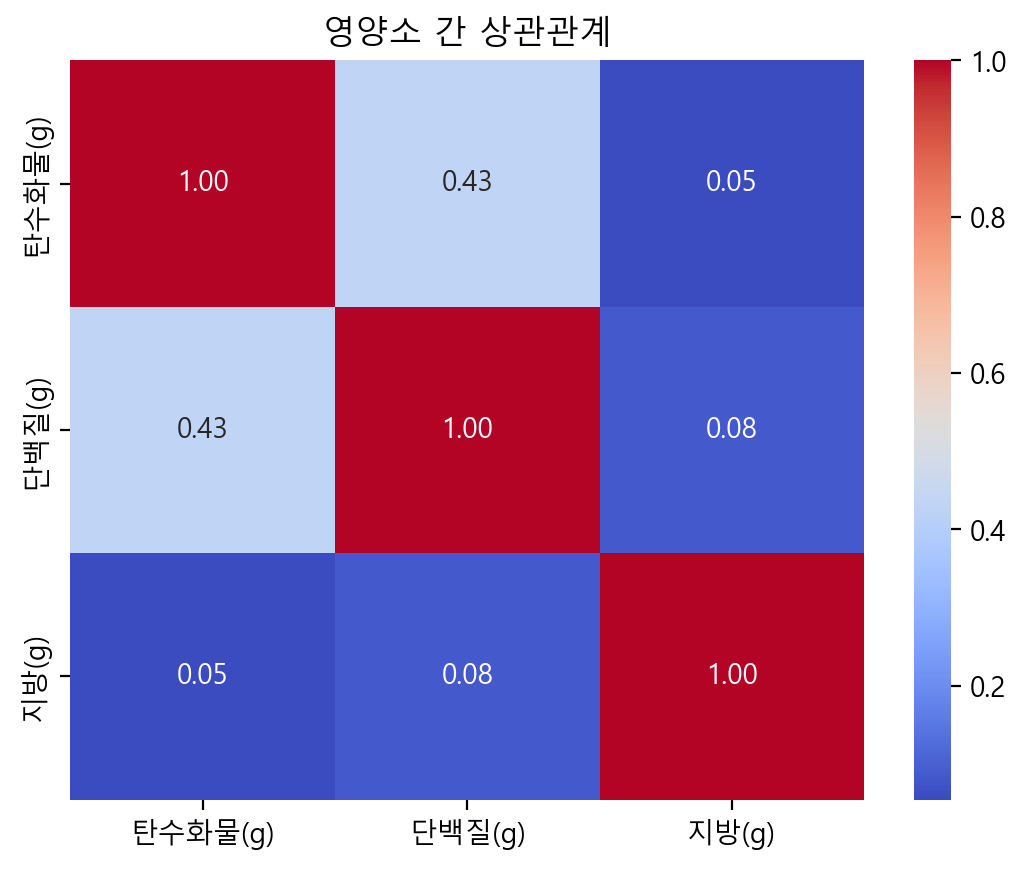

In [10]:
# 히스토그램으로 칼로리 분포 시각화
food_data['kcal'].plot(kind='hist', bins=30, figsize=(10, 6), title='칼로리 분포')
plt.xlabel('칼로리 (kcal)')
plt.show()

# 탄수화물, 단백질, 지방의 상관관계 확인
correlation = food_data[['탄수화물(g)', '단백질(g)', '지방(g)']].corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('영양소 간 상관관계')
plt.show()


In [12]:
# 예: 1회 섭취량 기준으로 저칼로리(300kcal 이하), 고단백(단백질 > 10g) 음식 필터링
diet_friendly_foods = food_data[(food_data['kcal'] <= 300) & (food_data['단백질(g)'] > 10)]
print(diet_friendly_foods)


            고유ID          식품명  1회 섭취량(g)   kcal  탄수화물(g)  단백질(g)  지방(g)  당류(g)
3        음식_육류구이          닭꼬치       70.0  176.7     13.3    11.6    8.6    3.2
6        음식_육류구이         돼지갈비      100.0  240.3      8.1    19.5   14.4    4.5
9       음식_어패류구이      붕장어소금구이      100.0  296.5     11.6    26.0   16.2    0.4
28     음식_어패류국.탕       바지락조개국      550.0  157.0     10.1    22.0    3.1    1.3
31      음식_육류국.탕        소고기무국      400.0  123.0      7.8    14.2    4.0    3.5
...          ...          ...        ...    ...      ...     ...    ...    ...
42263   가공식품_캔디류      탱탱콜라겐99       60.0  240.0      0.0    60.0    0.0    0.0
42278   가공식품_캔디류     맥주효모 비오틴       66.0  215.0     30.0    18.0    2.3   12.0
42280   가공식품_캔디류        콜라겐골드       45.0  170.0     18.0    22.0    1.1    0.0
42289   가공식품_캔디류      오도독 콜라겐       63.0  243.0     24.0    34.0    1.2   20.0
42324   가공식품_캔디류  하루두알 피쉬콜라겐정       36.0  120.0     19.4    11.6    0.0    8.1

[3499 rows x 8 columns]


In [13]:
def filter_foods(food_data, max_calories=300, min_protein=10):
    """
    특정 조건에 맞는 음식을 필터링하는 함수.
    """
    return food_data[(food_data['kcal'] <= max_calories) & (food_data['단백질(g)'] >= min_protein)]

filtered_data = filter_foods(food_data)
print(filtered_data)


            고유ID          식품명  1회 섭취량(g)   kcal  탄수화물(g)  단백질(g)  지방(g)  당류(g)
3        음식_육류구이          닭꼬치       70.0  176.7     13.3    11.6    8.6    3.2
6        음식_육류구이         돼지갈비      100.0  240.3      8.1    19.5   14.4    4.5
9       음식_어패류구이      붕장어소금구이      100.0  296.5     11.6    26.0   16.2    0.4
25     음식_어패류국.탕         매생이국      500.0  119.0     13.4    10.0    2.8    0.4
28     음식_어패류국.탕       바지락조개국      550.0  157.0     10.1    22.0    3.1    1.3
...          ...          ...        ...    ...      ...     ...    ...    ...
42263   가공식품_캔디류      탱탱콜라겐99       60.0  240.0      0.0    60.0    0.0    0.0
42278   가공식품_캔디류     맥주효모 비오틴       66.0  215.0     30.0    18.0    2.3   12.0
42280   가공식품_캔디류        콜라겐골드       45.0  170.0     18.0    22.0    1.1    0.0
42289   가공식품_캔디류      오도독 콜라겐       63.0  243.0     24.0    34.0    1.2   20.0
42324   가공식품_캔디류  하루두알 피쉬콜라겐정       36.0  120.0     19.4    11.6    0.0    8.1

[3885 rows x 8 columns]
